# Genetik Algoritma ile Optimizasyon

**Adınız:** Ceyda

**Soyadınız:** METİN

**Okul Numaranız:** 2212721025

**GitHub Repo Bağlantısı:** https://github.com/ceydametinn/genetik-algoritma-optimizasyon
---

## Senaryo 5: Kimya Tesisinde Reaksiyon Süresi ve Sıcaklık Ayarı

Kimyasal üretimde reaksiyon süresi ve sıcaklık ayarı sonucu verimi etkiliyor.


In [ ]:
# Gerekli kütüphaneleri ekliyoruz
# Sadece temel kütüphaneleri kullanıyoruz
import random
import matplotlib.pyplot as plt # Grafikler için

# --- SENARYO 5 PARAMETRELERİ ---
# Amaç: y = 8x1 + 3x2 - x1x2 + x1^2 fonksiyonunu maksimize etmek.

# Değişken Sınırları (Genlerin alabileceği değer aralıkları)
# x1: Reaksiyon süresi [10, 60]
# x2: Sıcaklık. Normalde [40, 120] verilmişti ama kısıtlarda x2 >= 60 dendiği için
#     algoritmayı rahatlatmak adına alt sınırı direkt 60 alıyoruz.
X1_MIN, X1_MAX = 10, 60
X2_MIN, X2_MAX = 60, 120

# Kısıt Değeri
MAX_TOPLAM = 140 # x1 + x2 <= 140 olmalı

# GA Ayarları (Bunlarla oynayarak sonucu iyileştirebiliriz)
POPULASYON_BUYUKLUGU = 20  # Her nesilde kaç birey (çözüm adayı) olacak?
NESIL_SAYISI = 50          # Kaç kuşak boyunca evrimleşecekler?
MUTASYON_ORANI = 0.1       # Genlerin rastgele değişme ihtimali (%10)

# --- 1. ADIM: BAŞLANGIÇ POPÜLASYONU OLUŞTURMA ---
def birey_olustur():
    """
    Rastgele bir birey (kromozom) oluşturur.
    Birey = [x1, x2] listesidir.
    """
    x1 = random.uniform(X1_MIN, X1_MAX)
    x2 = random.uniform(X2_MIN, X2_MAX)
    return [x1, x2]

def populasyon_olustur(sayi):
    """
    Belirtilen sayıda bireyden oluşan bir popülasyon listesi döndürür.
    """
    return [birey_olustur() for _ in range(sayi)]

# Test edelim: İlk popülasyonu görelim
ilk_populasyon = populasyon_olustur(5) # Örnek olarak 5 tane üretelim
print("İlk 5 Rastgele Çözüm Adayı (x1, x2):")
for i, birey in enumerate(ilk_populasyon):
    print(f"Birey {i+1}: Süre={birey[0]:.2f}, Sıcaklık={birey[1]:.2f}")

İlk 5 Rastgele Çözüm Adayı (x1, x2):
Birey 1: Süre=19.32, Sıcaklık=61.12
Birey 2: Süre=35.26, Sıcaklık=110.18
Birey 3: Süre=57.77, Sıcaklık=119.95
Birey 4: Süre=23.39, Sıcaklık=87.44
Birey 5: Süre=51.64, Sıcaklık=116.21


In [ ]:
# --- 2. ADIM: UYGUNLUK (FITNESS) HESAPLAMA ---

def fitness_hesapla(birey):
    x1 = birey[0]
    x2 = birey[1]

    # Kısıt Kontrolü: x1 + x2 <= 140 olmalı
    # Eğer toplam 140'ı geçerse, bu geçersiz bir çözümdür.
    if (x1 + x2) > MAX_TOPLAM:
        return -99999  # Çok düşük bir puan vererek elenmesini sağlıyoruz (Ceza Puanı)

    # Amaç Fonksiyonu: y = 8x1 + 3x2 - x1x2 + x1^2
    # Not: Python'da üs almak için ** kullanılır (x1**2 gibi).
    skor = (8 * x1) + (3 * x2) - (x1 * x2) + (x1**2)

    return skor

# Test edelim: İlk popülasyondaki bireylerin puanlarına bakalım
print("--- İlk Neslin Puan Durumu ---")
for birey in ilk_populasyon:
    puan = fitness_hesapla(birey)
    toplam_deger = birey[0] + birey[1]

    durum_mesaji = "GEÇERLİ"
    if puan == -99999:
        durum_mesaji = "ELENDİ (Kısıt Aşımı)"

    print(f"Birey: {birey[0]:.2f}, {birey[1]:.2f} | Toplam: {toplam_deger:.2f} | Puan: {puan:.2f} -> {durum_mesaji}")

--- İlk Neslin Puan Durumu ---
Birey: 19.32, 61.12 | Toplam: 80.44 | Puan: -469.64 -> GEÇERLİ
Birey: 35.26, 110.18 | Toplam: 145.45 | Puan: -99999.00 -> ELENDİ (Kısıt Aşımı)
Birey: 57.77, 119.95 | Toplam: 177.72 | Puan: -99999.00 -> ELENDİ (Kısıt Aşımı)
Birey: 23.39, 87.44 | Toplam: 110.82 | Puan: -1048.53 -> GEÇERLİ
Birey: 51.64, 116.21 | Toplam: 167.85 | Puan: -99999.00 -> ELENDİ (Kısıt Aşımı)


In [ ]:
# --- 3. ADIM: EVRİM OPERATÖRLERİ ---

def secilim(populasyon):
    """
    Popülasyonu puana (fitness) göre sıralar ve en iyi %50'yi seçer.
    """
    # Her birey için (Birey, Puan) ikilisi oluşturup sıralıyoruz
    sirali_populasyon = sorted(populasyon, key=fitness_hesapla, reverse=True)

    # En iyi yarısını seçelim (Geri kalanlar elenecek)
    secilen_sayisi = int(len(populasyon) / 2)
    return sirali_populasyon[:secilen_sayisi]

def caprazlama(anne, baba):
    """
    İki ebeveynden yeni bir çocuk üretir.
    Yöntem: Tek Noktalı Çaprazlama (Çocuk, anneden x1'i, babadan x2'yi alır)
    """
    cocuk_x1 = anne[0]
    cocuk_x2 = baba[1]
    return [cocuk_x1, cocuk_x2]

def mutasyon(birey):
    """
    Belirli bir olasılıkla genlerde küçük rastgele değişimler yapar.
    """
    mutasyonlu_birey = birey[:] # Kopyasını alıyoruz

    # Rastgele bir sayı üret, eğer MUTASYON_ORANI'ndan küçükse mutasyon yap
    if random.random() < MUTASYON_ORANI:
        # Hangi geni değiştirelim? Rastgele seç.
        gen_index = random.randint(0, 1)

        # Seçilen gene küçük bir miktar ekle veya çıkar (-5 ile +5 arası)
        degisim = random.uniform(-5, 5)
        mutasyonlu_birey[gen_index] += degisim

        # --- SINIR KONTROLÜ (ÖNEMLİ) ---
        # Mutasyon sonucu genler sınırların dışına çıkmasın diye düzeltiyoruz.
        # x1 sınırları: [10, 60]
        if gen_index == 0:
            mutasyonlu_birey[0] = max(X1_MIN, min(mutasyonlu_birey[0], X1_MAX))
        # x2 sınırları: [60, 120]
        else:
            mutasyonlu_birey[1] = max(X2_MIN, min(mutasyonlu_birey[1], X2_MAX))

    return mutasyonlu_birey

print("Fonksiyonlar tanımlandı. Ana döngüye hazırız!")

Fonksiyonlar tanımlandı. Ana döngüye hazırız!


Genetik Algoritma Başlıyor... (50 Nesil)
Nesil 10: En İyi Skor = 659.98
Nesil 20: En İyi Skor = 660.00
Nesil 30: En İyi Skor = 660.00
Nesil 40: En İyi Skor = 660.00
Nesil 50: En İyi Skor = 660.00

--- OPTİMİZASYON TAMAMLANDI ---
En İyi x1 (Süre)    : 60.00 dk
En İyi x2 (Sıcaklık): 60.00 °C
Toplam (x1+x2)      : 120.00 (Sınır 140)
Maksimum Verim (y)  : 660.00


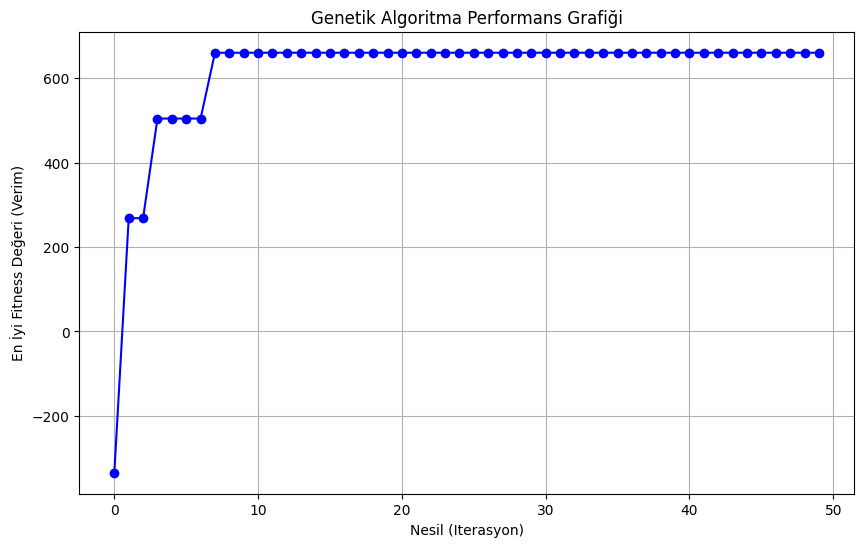

In [ ]:
# --- 4. ADIM: ANA DÖNGÜ (MAIN LOOP) ---

# İstatistikleri tutmak için boş liste (Grafik çizerken kullanacağız)
en_iyi_skorlar = []

# 1. Başlangıç popülasyonunu yarat
populasyon = populasyon_olustur(POPULASYON_BUYUKLUGU)

print(f"Genetik Algoritma Başlıyor... ({NESIL_SAYISI} Nesil)")

for nesil in range(NESIL_SAYISI):

    # A. Seçilim (En iyileri seç)
    # Seçilim fonksiyonumuz popülasyonun en iyi yarısını (%50) döndürüyordu.
    # Buna "Elitizm" denir; en iyiler doğrudan bir sonraki tura geçer.
    secilenler = secilim(populasyon)

    # Yeni nesil listesini başlatalım (Seçilenler zaten içinde)
    yeni_populasyon = secilenler[:]

    # B. Eksik kalan nüfusu tamamla (Çocuk üreterek)
    while len(yeni_populasyon) < POPULASYON_BUYUKLUGU:
        # Seçilenler arasından rastgele anne ve baba seç
        anne = random.choice(secilenler)
        baba = random.choice(secilenler)

        # Anne ve babayı çiftleştirme havuzuna sokmamak için farklı olmalarını tercih edebiliriz
        # ama basitlik adına rastgele seçim yeterlidir.

        # Çaprazlama
        cocuk = caprazlama(anne, baba)

        # Mutasyon
        cocuk = mutasyon(cocuk)

        # Yeni bireyi ekle
        yeni_populasyon.append(cocuk)

    # C. Popülasyonu güncelle
    populasyon = yeni_populasyon

    # D. İstatistik Kaydet (Bu neslin en iyisini bul)
    # Popülasyon zaten sıralı olduğu için ilk eleman en iyisidir.
    en_iyi_birey = populasyon[0]
    en_iyi_skor = fitness_hesapla(en_iyi_birey)
    en_iyi_skorlar.append(en_iyi_skor)

    # Her 10 nesilde bir ekrana bilgi yaz (Takip etmek için)
    if (nesil + 1) % 10 == 0:
        print(f"Nesil {nesil+1}: En İyi Skor = {en_iyi_skor:.2f}")

# --- SONUÇLARI YAZDIR ---
en_iyi_cozum = populasyon[0]
print("\n--- OPTİMİZASYON TAMAMLANDI ---")
print(f"En İyi x1 (Süre)    : {en_iyi_cozum[0]:.2f} dk")
print(f"En İyi x2 (Sıcaklık): {en_iyi_cozum[1]:.2f} °C")
print(f"Toplam (x1+x2)      : {en_iyi_cozum[0] + en_iyi_cozum[1]:.2f} (Sınır 140)")
print(f"Maksimum Verim (y)  : {fitness_hesapla(en_iyi_cozum):.2f}")

# --- GRAFİK ÇİZME (GÖRSELLEŞTİRME) ---
plt.figure(figsize=(10, 6))
plt.plot(en_iyi_skorlar, marker='o', color='b', linestyle='-')
plt.title('Genetik Algoritma Performans Grafiği')
plt.xlabel('Nesil (Iterasyon)')
plt.ylabel('En İyi Fitness Değeri (Verim)')
plt.grid(True)
plt.show()